# Machine Learning from Disasters - Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
# to display the output of plotting commands directly below the code cell

## Problemdefinition

Das Ziel dieses Machine Learning Problems ist es vorherzusagen, welche Passagiere das Titanic Unglück vom 15. April 1912 überlebt haben.

Aufgrund von der geringen Datenmenge und der einfachen Aufgabenstellugn, gilt der Titanic Datensatz neben dem [Iris Datensatz](https://en.wikipedia.org/wiki/Iris_flower_data_set) als "Hello-World" für Machine Learning Probleme. 

Die Vorhersage des Überlebens eines Passagiers auf der Titanic kommt aus dem Bereich des 
- **Supervised-Learnings**: das vorherzusagende Label Überlebt/Nicht-überlebt in den Daten vorhanden ist 

und stellt ein 
- Binäres **Klassifikationsproblem** dar: Es handelt sich um die Vorhersage einer Kategorie mit zwei Ausprägungen 

## Datenakquise

Üblicherweise stellen die Datenakquise und die Datenaufbereitung die arbeitsaufwändigsten Schritte bei einem Machine Learning Problem dar. 

Wollte man die Aufgabe bei Null beginnen, müsste mans sich durch Archive, Kataloge oder Zeitungsberichte wühlen, um so eine verlässliche Datenbasis aufzubauen. 

Glücklicherweise wurde uns dieser arbeitsaufwändige Schritt bereits abgenommen und der Datensatz kann im Internet (z.B. bei [kaggle](https://www.kaggle.com/c/titanic/data) runtergeladen werden. Da der Datensatz für explorative Zwecke sehr beliebt ist, ist er Teil von Python Pakten wie ``sci-kit learn`` und ``seaborn``.  

In [2]:
df_titanic = sns.load_dataset(name="titanic")

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survived</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

## Data Wrangling, Exploration, Cleaning

In der explorativen Datenanalyse sollte man zunächst ein Gefühl für die Datenbasis bekommen, um so wichtige Zusammenhänge erkennen zu können und entscheidene Parameter zu identifizieren. 

In [4]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Die `pandas` funktion `describe()` gibt für **numerische** Variablen erste Aufschlüsse über statistische Kennzahlen wie Mittelwert, Standardabweichung, minimale und mininale Werte.

In [5]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Für **kategorische** Variablen eignet sich die `pandas` Funktion `value_counts()` für einen ersten Überblick. Sie gibt die Anzahl an verschiedenen Kategorien und wie oft diese im Datensatz auftreten an.

In [6]:
df_titanic["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [7]:
df_titanic["pclass"].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

Damit ein Feature für das Training des Algorithmus verwendet werden kann, müssen für jede Zeile numerische Werte vorliegen. 

Dies ist bei Daten aus dem wirklichen Leben nicht immer der Fall. Fehlende Werte werden in der Regel mit einem `NaN` (Not A Number) Wert aufgefüllt.

Mithilfe der `pandas` Funktion `isna()` kann schnell beurteilt werden, wie viele Werte pro Spalte fehlen. 

In [8]:
pd.isna(df_titanic).sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Man kann mit fehlenden Daten auf unterschiedliche Weise umgehen: 
- Ignorieren der Spalte/ Features 
- Ignorieren des Zeile/ Datenpunktes
- Auffüllen des Wertes meist mit einer statistischen Kenngröße (Mittelwert, Median, Mode) 

Zusätzlich ist ein Verständnis für das Label (überlebt, nicht überlebt) unerlässlich.

In [9]:
df_titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [10]:
df_titanic["survived"].mean()

0.3838383838383838

## Visualisierung

Mithilfe von Visualisierungen lassen sich in den Daten versteckte Trends, Ausreißer oder potentielle Fehler einfacher erkennen als in den Rohdaten. 

Aus diesem Grund spielt die Visualisierung der Daten eine zentrale Rolle in jeder Machine Learning Pipeline. 

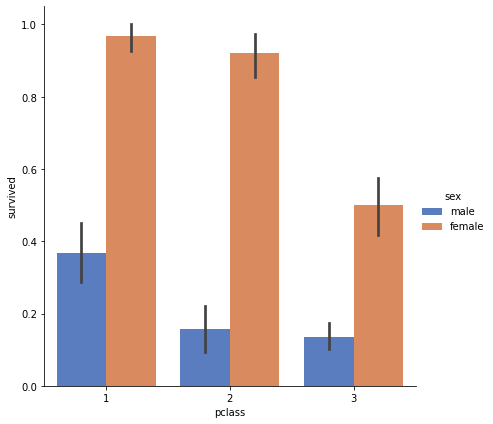

In [13]:
sns.catplot(x="pclass",
            y="survived",
            hue="sex", 
            data=df_titanic,
            height=6, 
            kind="bar",
            palette="muted");

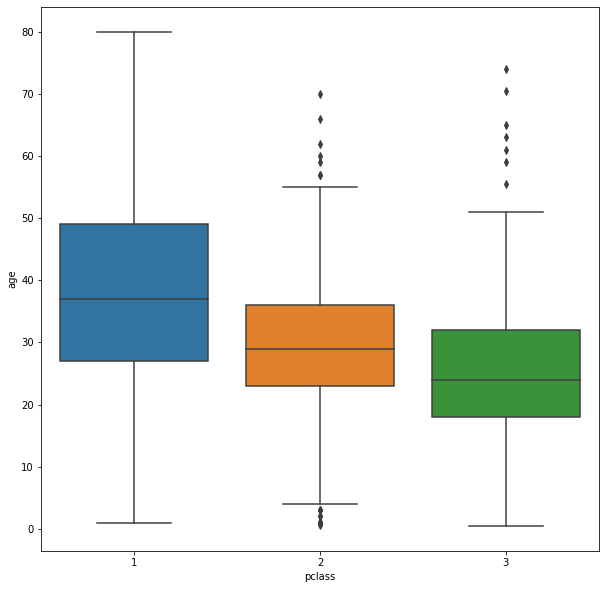

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="pclass", 
            y="age",
           # height=10,
            data=df_titanic); 

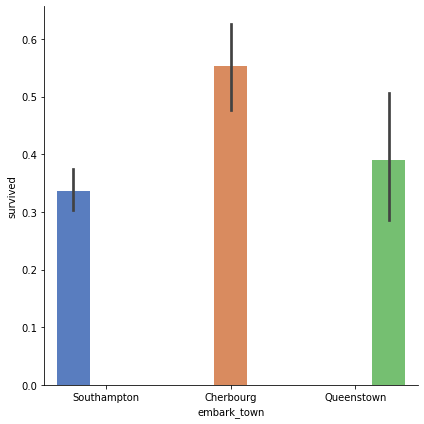

In [15]:
sns.catplot(x="embark_town", 
            y="survived",
            hue="embark_town", 
            data=df_titanic,
            height=6, 
            kind="bar",
            palette="muted")

In [17]:
pd.DataFrame(df_titanic.groupby(["embark_town", "pclass"])["survived"].agg("count"))

survived
embark_town pclass          
Cherbourg   1             85
            2             17
            3             66
Queenstown  1              2
            2              3
            3             72
Southampton 1            127
            2            164
            3            353

<AxesSubplot:xlabel='embark_town'>

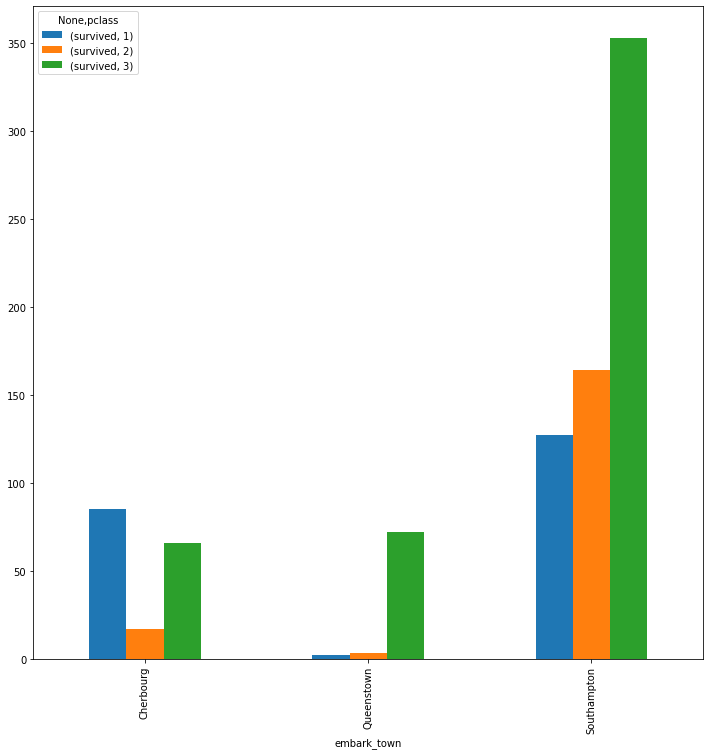

In [18]:
f, ax = plt.subplots(figsize=(12, 12))
pd.pivot(df_titanic.groupby(["embark_town", "pclass"])["survived"].agg("count").reset_index(drop=False), 
         index="embark_town", columns="pclass").plot(kind="bar", ax=ax)

## Vorbereitung des Datensatzes für Machine Learning

Bei Daten aus dem wirklichen Leben kann es vorkommen, dass nicht 
für alle Zeilen sämtliche Daten alle Informationen vorhanden sind. 
Dies muss vor dem Trainieren des Modells berücksichtigt werden. 

In [19]:
pd.isna(df_titanic).sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Da für das Training alle Zeilen und Spalten numerisch sein müssen, wird die Spalte `deck` und alle Zeilen die `NaN` ein NaN enthalten aus dem Datensatz entfernt.

In [20]:
df_titanic["sex"] = df_titanic["sex"].map({"male": 0, 
                                           "female": 1})

In [21]:
df_titanic_nona = df_titanic.drop(columns="deck")
df_titanic_nona = df_titanic_nona.dropna(how="any", axis=0)

In [22]:
print(df_titanic.shape)
print(df_titanic_nona.shape)

(891, 15)
(712, 14)


Als nächstes können die Features `X` und die Labels `y` als Variabeln definiert werden.

In [23]:
X = df_titanic_nona[["sex", 
                     "age",  
                     "fare"]]
y = df_titanic_nona["survived"]

Im nächsten Schritt erfolgt die Aufteilung in ein Trainings- und ein Testdatensatz. 

In diesem Fall werden 80% der Daten zum Trainieren und 20% der Daten zum Testen verwendet. 

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Für viele Algorithmen ist es entscheidend, dass die Daten in der gleichen Größenordnung sind, z.B. von $[0...1]$ oder von $[-1...1]$.

Die einfachste Möglichkeit dies zu erreichen ist ein `MinMaxScaler`. 

Dieser transformiert jedes Feature `x` in der Feature Matrix `X` durch die Formel $\frac{x-min(x)}{max(x)-min(x)}$ in ein Bereich von $[0...1]$. 

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_test.min(axis=0))
print(X_test.max(axis=0))

[0. 0. 0.]
[1. 1. 1.]
[0.         0.00314149 0.        ]
[1.         0.81151043 0.51334181]


Dann können verschiedene Klassifizierer ausgewählt werden. 

Die `scikit-learn` API erlaubt es durch ihre einheitliche Syntax problemlos verschiedene Klassifizierer auszuwählen.

Bei der Instanziierung der Klassifizierer Klassen können Hyperparameter übergeben werden.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#clf = KNeighborsClassifier(n_neighbors=5)
#clf = SVC()
clf = GaussianNB()
#clf = RandomForestClassifier(n_estimators=100)


Als nächstes wird der ausgewählte Klassifizierer gefittet/ trainiert. 

Bei diesem Prozess wird der Zusammenhang zwischen den Features (`X_train`) und der Labels (`y_train`) des Trainingsdatensatzes "gelernt". 

Das Training stellt i.d.R. den rechenintensivsten Schritt der Machine Learning Pipeline dar. Aufgrund der geringen Datenmenge ist das Training für den Titanic Datensatz sehr schnell. 

In [35]:
clf = clf.fit(X_train, y_train)

Der trainierte Klassifizierer kann nun für die Vorhersage von Labels für unbekannte Daten (`X_test`) verwendet werden.

In [36]:
y_fit = clf.predict(X_test)
y_fit

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0], dtype=int64)

Da für den Testdatensatz auch die Label bekannt sind, lässt sich anhand eines Vergleiches von dem vorhergesagten und dem tatsächlichen Label die Güte des Modells bewerten.

In diesem Fall wird für die Güte des Algorithmus die Genauigkeit (Anzahl an korrekten Vorhersagen/Anzahl an allen Vorhersagen) herangezogen. 

In [37]:
clf.score(X_test, y_test)

0.7584269662921348

In [38]:
X = df_titanic_nona[["sex", 
                     "age", 
                     "pclass", 
                     "fare"]]
y = df_titanic_nona["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.75,
                                                    random_state=0)

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#clf = KNeighborsClassifier(n_neighbors = 5)
#clf = SVC()
clf = GaussianNB()
#clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train).score(X_test, y_test)

0.7584269662921348